## Cifar:  Building a neural network

https://www.cs.toronto.edu/~kriz/cifar.html

### ImageDataGenerator

=> https://keras.io/preprocessing/image/

In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from keras.datasets import cifar10

### Prepare the input image

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

import numpy as np

X_train = X_train.astype(np.float32) / 255.
X_test = X_test.astype(np.float32) / 255.

### Class 1 is automobile

[1]


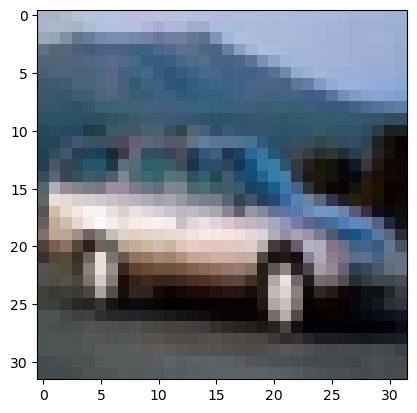

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt

print(y_train[4])
plt.imshow(X_train[4])
plt.show()

## build the Model

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import RMSprop

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation="relu", padding="same"))
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer=RMSprop(learning_rate=0.0001), loss="binary_crossentropy", metrics=["accuracy"])

In [6]:
### Modell visualisieren: https://keras.io/visualization/
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 844,577 (3.22 MB)

 Trainable params: 844,577 (3.22 MB)

 Non-trainable params: 0 (0.00 B)

### These transformations help the model become more robust against variations in the input data.

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# label1 is automobile 
y_train_car = y_train == 1

gen = ImageDataGenerator(width_shift_range=3, height_shift_range=3, zoom_range=0.1, horizontal_flip=True)

model.fit(gen.flow(X_train, y_train_car, batch_size=128, shuffle=True), epochs=50)

C:\Users\abdul\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 78s 191ms/step - accuracy: 0.9031 - loss: 0.3295
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 76s 193ms/step - accuracy: 0.9035 - loss: 0.2418
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 76s 194ms/step - accuracy: 0.9030 - loss: 0.2302
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 76s 194ms/step - accuracy: 0.9121 - loss: 0.2145
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 75s 192ms/step - accuracy: 0.9212 - loss: 0.1949
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 80s 203ms/step - accuracy: 0.9252 - loss: 0.1836
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 75s 193ms/step - accuracy: 0.9306 - loss: 0.1698
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 77s 196ms/step - accuracy: 0.9350 - loss: 0.1628
Epoch 9/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 75s 192ms/step - accuracy: 0.9390 - loss: 0.1517
Epoch 10/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 76s 195ms/step - accuracy: 0.9440 - loss: 0.1413
Epoch 11/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 84s 200ms/step - accuracy: 0.9419 - loss: 0.1443
Epoch 12/50
391/391

In [7]:
print(model.evaluate(X_train, y_train_car))

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9891 - loss: 0.0336
[0.033721890300512314, 0.9886999726295471]


In [8]:
y_test_car = y_test == 1
print(model.evaluate(X_test, y_test_car))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9841 - loss: 0.0491
[0.05265715345740318, 0.9818000197410583]


In [9]:
model.save("cardetector.keras")